## Learning Objectives

This module reviews the basics of data analysis in Python using the pandas library. At the end of this module, you should be able to:
- Read and explore tabluar data in Python using the pandas library
- Perform basic data analysis using pandas data structures and functions
- Clean datasets to remove missing values
- Use your own functions to process table data
- Manipulate data tables that include dates/times (temporal datasets) and resample their values


## What is geopandas?

The [geopandas library](https://geopandas.org/) is an easy-to-use, powerful data analysis toolkit for working with geospatial data. It extends the capabilities of pandas to allow spatial operations on geometric types. The development of geopandas started in 2013 and it is now maintained by an active developer community.

geopandas is a "high-level" package, which means that it makes use of several other packages in the background. It combines the performance of powerful Python libraries such as [pandas](https://pandas.pydata.org/), [shapely](https://shapely.readthedocs.io/), [fiona](https://fiona.readthedocs.io/), and [pyproj](https://pyproj4.github.io/).

One of the most useful features of geopandas is its ability to interact with numerous geospatial data formats. It supports reading and writing data from/to formats including

- ESRI Shapefile
- GeoJSON
- KML
- GPKG
- PostGIS
- Spatialite

For a full list of supported file formats and other features, please refer to the official [geopandas documentation and reference guide](https://geopandas.org/).


## Pandas data structures

In pandas, table-like data are stored in two-dimensional `DataFrame` objects with labeled rows and columns. The pandas DataFrame was originally inspired by data frames that are in the R programming language. You can think of a DataFrame in pandas as a programmable spreadsheet. One-dimensional sequences of values are stored as a pandas `Series`. A single row or column in a pandas DataFrame is actually a pandas Series. You can think of a pandas Series as a clever list.

![_**Figure 1**. Illustration of the pandas DataFrame and Series data structures. A pandas DataFrame is a two-dimensional data structure used for storing and manipulating table-like data (data with rows and columns). A pandas Series is a one-dimensional data structure used for storing and manipulating a sequence of values._](../img/pandas-structures-annotated.png)

_**Figure 1**. Illustration of the pandas DataFrame and Series data structures. A pandas DataFrame is a two-dimensional data structure used for storing and manipulating table-like data (data with rows and columns). A pandas Series is a one-dimensional data structure used for storing and manipulating a sequence of values._

As you can see from Figure 1, both the DataFrame and Series in pandas have an index that can be used to select values, but DataFrame objects also have labels to identify columns. In the following sections, we will use many of these features to explore real-world data and learn some handy data analysis procedures using pandas. For a comprehensive overview of pandas data structures, we recommend you have a look at the [pandas online documentation about data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html) as well as Chapter 5 in the book [Python for Data Analysis](https://wesmckinney.com/book/).


## Reading tabular data 

In the following sections, we will learn how to read data from a text file (`data/GHCNd_Houghton.csv`), which contains the weather observations at the Houghton-Hancock airport from 1950 to 2024. The data are downloaded from the [NOAA Global Historical Climatology Network daily (GHCNd) database](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily). The first 15 rows in the file look like the following:

```
# Daily climate summaries in Houghton Michigan
# Data source: NOAA NCEI GHCNd
# 
# AWND - Daily mean wind speed (m/s)
# FMTM - Time of fastest 1-minute wind (hours and minutes HHMM)
# PRCP - Precipitation (mm)
# SNOW - Snowfall (mm)
# TMAX - Maximum temperature (Celsius)
# TMIN - Minimum temperature (Celsius)

DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
1990-01-01,,,1.0,18.0,-3.9,-6.1
1990-01-02,,,0.0,0.0,1.1,-5.6
1990-01-03,,,0.0,0.0,2.2,-5.0
1990-01-04,,,1.3,23.0,-1.7,-9.4
```

Now that we have familiarized ourselves with the data, we can continue and see how to read the data using pandas. Let's start by importing the pandas module. It is customary to import pandas as `pd`.


In [1]:
import numpy as np
import pandas as pd

As we can observe, there are some metadata at the top of the file giving basic information about its contents and source. This is not data we want to process, so we need to skip over that part of the file when we read it. Here are the 9 first rows of data in the text file (note that the 3rd row is blank).

```
# Daily climate summaries in Houghton Michigan
# Data source: NOAA NCEI GHCNd
# 
# AWND - Daily mean wind speed (m/s)
# FMTM - Time of fastest 1-minute wind (hours and minutes HHMM)
# PRCP - Precipitation (mm)
# SNOW - Snowfall (mm)
# TMAX - Maximum temperature (Celsius)
# TMIN - Minimum temperature (Celsius)
```

Next, we will read the input data file and store the contents of that file into a variable called `data` using the `.read_csv()` function. Skipping over rows is easy to do when reading data with pandas. We just need to add the `skiprows` parameter when we read the file, listing the number of rows to skip (11 in this case).

In [2]:
data = pd.read_csv("../data/GHCNd_Houghton.csv",skiprows=9)

Our input file is a comma-delimited file, meaning that the columns in the data are separated by commas (`,`) on each row. The `.read_csv()` function uses comma as the default delimiter, hence we did not need to specify it separately in the command above. If all went as planned, you should now have a new variable `data` in memory that contains the input data. 

It is quite common to have some other character instead of a comma separating the columns from each other. The .read_csv() in pandas is a generic function for reading text-based data files, supporting files separated by commas, spaces, or other common separators. The `sep` parameter can be used to specify which character is used as a delimiter. For instance `sep=';'`, would be used when the columns in the data file are delimited with a semicolon (;). For a full list of available parameters for the read_csv() function, please refer to the [pd.read_csv() documention](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) or run `help(pd.read_csv)`. 

Pandas has several other functions for parsing input data from different file formats. For example, reading Excel files can be easily done using the `.read_excel()` function. Another useful function is `.read_pickle()`, which reads data stored in the Python pickle format. Check out the [pandas documentation about input and output tools](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for more details about reading data.

Let's check the the contents of our data. You can print the contents of a DataFrame (or a snippet of it) simply by calling it by name (e.g., `data`). However, quite often you want to check only a selection of *n* rows from the start or end of the data set. For doing that, we can use the `.head()` method of the DataFrame object that will, by default, return the first five rows of the DataFrame. You can return any number of rows by adding that number inside the parentheses. For example, `data.head(10)` would return the first ten rows from the DataFrame called `data`.

In [3]:
data.head(10)

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,NaN,NaN,1.0,18.0,-3.9,-6.1
1,1990-01-02,NaN,NaN,0.0,0.0,1.1,-5.6
2,1990-01-03,NaN,NaN,0.0,0.0,2.2,-5.0
3,1990-01-04,NaN,NaN,1.3,23.0,-1.7,-9.4
4,1990-01-05,NaN,NaN,3.0,97.0,-7.2,-10.6
5,1990-01-06,NaN,NaN,0.0,0.0,-1.7,-16.1
6,1990-01-07,NaN,NaN,0.0,0.0,2.2,-4.4
7,1990-01-08,NaN,NaN,0.0,0.0,5.6,-4.4
8,1990-01-09,NaN,NaN,0.8,8.0,1.1,-6.7
9,1990-01-10,NaN,NaN,0.0,0.0,0.6,-6.7


#### Question

How would you read the file in once again selecting only the `DATE` and `SNOW` columns? Try reading the file into a new variable called `snow_data` and only selecting two columns.

In [4]:
# Use this cell to enter your solution.


Hint: Using the `usecols` parameter to limit the number of columns can be useful when working with data files that have possibly tens or even hundreds of columns. Typically you are not interested in all of them, but you want focus on only a few important ones which you can select already when reading the data.  

## DataFrame properties

Now we will continue exploring the data set we have stored in the variable `data`. A normal first step when you load new data is to explore the data set a bit to understand how the data is structured, and what kind of values are stored in in. Let's start by checking the size of our DataFrame. We can use the `len()` function similar to the use with lists to see how many rows we have.

In [5]:
len(data)

12751

We can also get a quick sense of the size of the data set using the attribute `.shape`. It returns a `tuple` with the number of rows as the first element and the number of columns as the second element.

In [6]:
data.shape

(12751, 7)

Here we see that our data set has 12751 rows and 7 columns. Note that we do not use parentheses after the word `shape` when accessing attributes. `.shape` is one of several attributes related to a pandas DataFrame object. Attributes are typically used to store useful information (or *metadata*) about the object at hand.

Let's also check the column names we have in our DataFrame (yes, this is an attribute as well!). We already saw the column names when we checked the first several rows using `data.head()`, but often it is useful to access the column names directly. You can check the column names using the `.columns` attribute, which returns an index object that contains the column labels. Alternatively, we can add the `.values` attribute to get an array of the column names. For example, we could check the column names by typing `data.columns.values`.

In [7]:
data.columns.values

array(['DATE', 'AWND', 'FMTM', 'PRCP', 'SNOW', 'TMAX', 'TMIN'],
      dtype=object)

We can also find information about the row identifiers using the `.index` attribute.

In [8]:
data.index

RangeIndex(start=0, stop=12751, step=1)

Here we see how the data is indexed, starting at `0`, ending at `12751`, and with an increment of 1 between each value. This is basically the same way in which Python lists are indexed, however, pandas allows also other ways of identifying the rows. DataFrame indices could, for example, be date objects. We will learn more about resetting the index later. What about the data types of each column? We can check the data type of all columns at once using the `.dtypes` attribute.

In [9]:
# Print data types
data.dtypes

DATE     object
AWND    float64
FMTM    float64
PRCP    float64
SNOW    float64
TMAX    float64
TMIN    float64
dtype: object

Here we see that `DATE` and `STATION` contain string values (`object`), while the other columns contain decimal values with 64-bit precision (`float64`).

#### Question
How would you print out the number of columns in the DataFrame?

In [10]:
# Use this cell to enter your solution.


## Selecting and updating data

We often want to make selections from our data and only use specific rows from a DataFrame in the analysis. There are multiple ways of selecting subsets from a pandas DataFrame that can be based on specific index values, for example, or using some predefined criteria to make the selection such as selecting all rows where values in column `X` are larger than `0`. Next, we will go through the most useful ways of selecting specific rows, columns, and individual values.

### Selecting rows and columns

One common way of selecting only specific rows from a DataFrame is done via the concept of slicing. Getting a slice of data in pandas can be done in a similar manner as with normal Python lists, by specifying an index range inside square brackets: `DataFrame[start_index:stop_index]`. Let's select the first five rows and assign them to a variable called `selection`. Here, we will first see how selecting the data based on index values works just like with "normal" Python lists.

In [11]:
selection = data[0:5]
selection

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,NaN,NaN,1.0,18.0,-3.9,-6.1
1,1990-01-02,NaN,NaN,0.0,0.0,1.1,-5.6
2,1990-01-03,NaN,NaN,0.0,0.0,2.2,-5.0
3,1990-01-04,NaN,NaN,1.3,23.0,-1.7,-9.4
4,1990-01-05,NaN,NaN,3.0,97.0,-7.2,-10.6


Here we have selected the first five rows (index `0`-`4`) using the integer index. Notice that the logic here is similar to how Python's `list` slicing (or `range()` function) works; the value on the right side of the colon (here number `5`) is the stop value, which is excluded from the range selection. Hence, the syntax is `[start_index:stop_index]`. In addition, the parameter `:step` could be added at the end in indicate the step size between values (`1` by default). 

Selections like the previous example are possible, but there is a better and more flexible way of selecting data using the [`pandas` `.loc[]` label-based indexer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html). As the name suggests, `.loc[]` selects data based on axis labels (row and column labels). This alone does not necessarily tell much to you at this point, but `.loc[]` makes it possible to conduct more specific selections, such as allowing you to choose which columns are chosen when selecting a subset of rows. It also makes possible to benefit from row labels that are not necessarily sequential numbers (as has been the case with all our examples thus far). For instance, you can make selections for rows indexed by dates or timestamps. Hence, `.loc[]` can become very handy when working with time series data (we will learn more about this later). Let's now test out the `.loc[]` label indexer by selecting values from column `TEMP` from rows `0`-`5`.

In [12]:
# Select temp column values on rows 0-5
selection = data.loc[0:5, "TMIN"]
selection

0    -6.1
1    -5.6
2    -5.0
3    -9.4
4   -10.6
5   -16.1
Name: TMIN, dtype: float64

Notice that in this case, we get six rows of data (index `0`-`5`)! This happens because we are now doing the selection based on axis labels instead of normal Python collection indices. It is important to notice the difference between these two approaches, as mixing the two may cause confusion, incorrect analysis results, or bugs in your code. We recommend to use `.loc[]` whenever possible (there are specific cases when you may want to use other approaches). The basic syntax for using `.loc[]` is:
 
```python
.loc[first_included_label:last_included_label, columns]
```

By looking at the syntax, you might imagine that it is possible to select multiple columns when using `.loc[]`. We can test this by selecting the `TMIN` and `TMAX` columns from a set of rows by passing the selected column names inside a list.

In [13]:
selection = data.loc[0:5, ["TMAX", "TMIN"]]
selection

,TMAX,TMIN
0,-3.9,-6.1
1,1.1,-5.6
2,2.2,-5.0
3,-1.7,-9.4
4,-7.2,-10.6
5,-1.7,-16.1


As a result, we now have a new DataFrame with two columns and 6 rows (i.e., index labels ranging from `0` to `5`).

#### Question

Calculate the maximum temperature for the first 10 days of February 1950. Do the selection using the row index values.

In [14]:
# Use this cell to enter your solution.


### Selecting a single row or value

You can also select an individual row from specific position using the `.loc[]` indexing. Here we select all the data values using index `4` (the 5th row).

In [15]:
row = data.loc[4]
row

DATE    1990-01-05
AWND           NaN
FMTM           NaN
PRCP           3.0
SNOW          97.0
TMAX          -7.2
TMIN         -10.6
Name: 4, dtype: object

`.loc[]` indexing returns the values from that row as a `Series` where the indices are actually the column names of the row variables. Hence, you can access the value of an individual column by referring to its index using following format:

In [16]:
# Print one attribute from the selected row
row["TMAX"]

-7.2

Sometimes it is enough to access a single value in a DataFrame directly.

In [17]:
data.loc[4,'TMAX']

-7.2

### Selections based on index positions

As we have learned thus far, `.loc[]` is based on the axis labels, the names of columns and rows. For positional based indexing, pandas has an [`.iloc[]` indexer](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html), which is based on integer value indices. With `.iloc[]` it is also possible to refer to the columns based on their index value (i.e., to a positional number of a column in the DataFrame). For example, `data.iloc[0, 0]` would return `1950-01-01` in our example DataFrame, which is the value on the first row and first column in the data.

In [18]:
data.iloc[0, 0]

'1990-01-01'

The syntax for using `.iloc[]` is: 

```python
.iloc[start_row_position:stop_row_position,
      start_column_position:stop_column_position]
```

It is also possible to get ranges of rows and columns with `.iloc[]`. For example, we could select the `DATE` to `PRCP` columns from the first five rows based on their indices (positions) in the data set. Here, we will select rows from positions 0 to 5 and columns from positions 0 to 4.

In [19]:
selection = data.iloc[0:5, 0:4]
selection

,DATE,AWND,FMTM,PRCP
0,1990-01-01,NaN,NaN,1.0
1,1990-01-02,NaN,NaN,0.0
2,1990-01-03,NaN,NaN,0.0
3,1990-01-04,NaN,NaN,1.3
4,1990-01-05,NaN,NaN,3.0


### Selections using listed criteria

Another common way of selecting rows from a DataFrame is to provide a list of values that are used for finding matching rows in a specific DataFrame column. For example, selecting rows that match specific dates can be done by passing a list of values used as criteria to the [`.isin()` function of pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html). This will go through each value in the selected column (in this case `DATE`) and check whether there is a match or not. As an output, the `.isin()` function returns a `Series` of Boolean values (True or False) that can be combined with `.loc[]` to do the final selection that returns only rows that meet the selection criteria. 

In [20]:
# List of values that will be used as basis for selecting the rows
selection_criteria = ['2024-01-01','2024-01-02','2024-01-03']

# Do the selection based on criteria applied to YEARMODA column
data.loc[data["DATE"].isin(selection_criteria)]

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
12415,2024-01-01,3.8,NaN,0.0,NaN,-1.0,-5.5
12416,2024-01-02,6.5,NaN,0.3,NaN,1.1,-3.2
12417,2024-01-03,5.5,NaN,0.3,NaN,0.0,-6.6


### Conditional selections

One really useful feature in pandas is the ability to easily filter and select rows based on a conditional statement. The following example shows how we can check whether the temperature at each row of the `TMAX` column is greater than or equal to 25 degrees.

In [21]:
data["TMAX"] >= 25

0        False
1        False
2        False
3        False
4        False
         ...  
12746    False
12747    False
12748    False
12749    False
12750    False
Name: TMAX, Length: 12751, dtype: bool

As a result, we get a Series of Boolean values, where the value `True` or `False` at each row determines whether or not our condition was met. This kind of `Series` or `numpy.array` of Boolean values based on some predefined criteria is typically called a mask. We can take advantage of this mask when doing selections with `.loc[]` based on specific criteria. In the following example, we use the same criterion as above and store all rows meeting the criterion into the variable `hot_temps` ("hot" temperatures). We can specify the criterion directly inside the square brackets of the `.loc[]` indexer. Let's select rows that have a temperature greater than or equal to 25 degrees.

In [22]:
hot_temps = data.loc[data["TMAX"] >= 25]
hot_temps

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
112,1990-04-23,NaN,NaN,8.6,0.0,27.2,8.9
113,1990-04-24,NaN,NaN,3.6,0.0,27.8,14.4
114,1990-04-25,NaN,NaN,0.0,0.0,31.1,13.3
115,1990-04-26,NaN,NaN,5.1,0.0,27.8,15.6
151,1990-06-01,NaN,NaN,0.0,0.0,25.0,11.1
...,...,...,...,...,...,...,...
12655,2024-09-26,1.7,NaN,0.0,NaN,26.1,8.3
12656,2024-09-27,3.3,NaN,0.0,NaN,26.1,10.6
12657,2024-09-28,2.0,NaN,0.0,NaN,26.7,10.6
12659,2024-09-30,3.3,NaN,0.0,NaN,26.1,7.8


It is also possible to combine multiple criteria at the same time. Combining multiple criteria can be done using the `&` (and) or the `|` (or) operators. Notice, that it is often useful to separate the different conditional clauses with parentheses `()`. Let's select rows having daily maximum temperatures above 20 degrees from 2010 onwards.

In [23]:
warm_temps = data.loc[(data["TMAX"] >= 20) & (data["DATE"] >= '2010-01-01')]
warm_temps

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
7392,2010-03-31,5.2,907.0,0.0,NaN,22.8,8.3
7394,2010-04-02,5.2,1824.0,0.0,NaN,25.6,7.8
7406,2010-04-14,4.1,1015.0,0.8,NaN,22.2,6.1
7407,2010-04-15,5.8,1823.0,1.5,NaN,22.8,10.0
7415,2010-04-23,2.2,1251.0,0.0,NaN,20.0,-1.7
...,...,...,...,...,...,...,...
12677,2024-10-18,3.3,NaN,0.0,NaN,23.9,9.4
12679,2024-10-20,5.0,NaN,0.0,NaN,21.7,11.1
12680,2024-10-21,3.2,NaN,0.0,NaN,20.6,11.1
12681,2024-10-22,4.2,NaN,5.6,NaN,25.0,11.7


## Unique values

Sometimes it is useful to extract the unique values that you have in your column. We can do that by using `.unique()` method.

In [24]:
data["FMTM"].unique()

array([  nan,   30., 1944., ..., 1923.,  538.,  936.])

As a result we get an array of unique values in that column. In the case of wind speed, this might not be that interesting, but in other cases this can be more useful. We can also directly access the number of unique values using the `.nunique()` method.

In [25]:
print(f"There were {data['FMTM'].nunique()} days with unique maximum wind speed.")

There were 1266 days with unique maximum wind speed.


## Descriptive statistics

The DataFrame and Series data types in pandas contain useful methods for getting summary statistics. Available methods include `.mean()`, `.median()`, `.min()`, `.max()`, and `.std()` (the standard deviation). The statistics can be calculated for a single column (i.e., a `Series`) or for all columns at once for the entire DataFrame. To check the maximum temperature in our DataFrame, we can do following:

In [26]:
data['TMAX'].max()

36.7

The output in this case will be a single floating point number presenting the maximum of the observed daily maximum temperature. To get the maximum statistics for all numerical columns in the DataFrame, we can use `.max()` in a similar manner.

In [27]:
data[['AWND','FMTM','PRCP','SNOW','TMAX','TMIN']].max()

AWND      16.5
FMTM    9999.0
PRCP     151.4
SNOW     673.0
TMAX      36.7
TMIN      23.9
dtype: float64

For an overview of the basic statistics for all attributes in the data, we can use the `.describe()` method.

In [28]:
data[['AWND','FMTM','PRCP','SNOW','TMAX','TMIN']].describe()

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
count,8836.000000,4591.000000,12644.000000,3896.000000,12744.000000,12744.000000
mean,4.357198,1371.487475,1.851479,13.318018,9.814422,0.785852
std,1.971740,716.514153,5.220193,40.367303,11.895030,10.192673
min,0.400000,0.000000,0.000000,0.000000,-26.700000,-31.600000
25%,2.900000,1043.000000,0.000000,0.000000,0.000000,-6.600000
50%,4.000000,1430.000000,0.000000,0.000000,9.400000,1.100000
75%,5.400000,1732.000000,1.000000,0.000000,20.600000,9.400000
max,16.500000,9999.000000,151.400000,673.000000,36.700000,23.900000


## Data type conversions
When doing data analysis, another quite typical operation that needs to be done is to convert values in a column from one data type to another, such as from floating point values to integers. For values stored in a pandas Series, we can use the `.astype()` method for converting data types. Let's explore this by converting the `FMTM` column (type `float64`) to integers (type `int64`). Let's first have a look at the existing data. Since the `FMTM` column has many missing values, so we use `.notna()` to select the rows with valid data only.

In [29]:
data.loc[data['FMTM'].notna(), "FMTM"].head()

3896      30.0
3897    1944.0
3898     307.0
3899    1333.0
3900    1743.0
Name: FMTM, dtype: float64

Now we can easily convert those decimal values to integers using `.astype('Int64')`.

In [30]:
data['FMTM'] = data['FMTM'].astype('Int64')
data.loc[data['FMTM'].notna(), "FMTM"].head()

3896      30
3897    1944
3898     307
3899    1333
3900    1743
Name: FMTM, dtype: Int64

Great! As we can see the values were converted to integers. But, notice that the new data type is `Int64`, not `int64`. The reason why we use `Int64` is because the `FMTM` column has missing or NaN values. Int64 is a pandas-specific **nullable integer type** introduced to handle missing values in integer columns.

## Dealing with missing data

As you may have noticed, the maximum value of `FMTM` is 9999, which is not a valid time (HHMM). It should be treated as missing or NaN values, instead. Having missing data in your data file is quite common and typically you want to deal with these values somehow. The NaN values may be left empty in some places, and may be filled with certain numbers, e.g., 9999. Below, we will replace the values of 9999 with NaN values. This can be accomplished in two different ways.

We can either replace the 9999 values in the `data` DataFrame with np.nan (np represent numpy), or designate the missing values when reading in the data using `.read_csv()`.

In [31]:
data = data.replace(9999, np.nan)

# To verify that the missing values are removed:
data[['AWND','FMTM','PRCP','SNOW','TMAX','TMIN']].describe()

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
count,8836.000000,4583.0,12644.000000,3896.000000,12744.000000,12744.000000
mean,4.357198,1356.427449,1.851479,13.318018,9.814422,0.785852
std,1.971740,619.760534,5.220193,40.367303,11.895030,10.192673
min,0.400000,0.0,0.000000,0.000000,-26.700000,-31.600000
25%,2.900000,1042.5,0.000000,0.000000,0.000000,-6.600000
50%,4.000000,1430.0,0.000000,0.000000,9.400000,1.100000
75%,5.400000,1732.0,1.000000,0.000000,20.600000,9.400000
max,16.500000,2359.0,151.400000,673.000000,36.700000,23.900000


Or, do everything all at once within `.read_csv()`:

In [32]:
data = pd.read_csv("../data/GHCNd_Houghton.csv",skiprows=9,dtype={'FMTM':'Int64'},na_values=[9999])

data[['AWND','FMTM','PRCP','SNOW','TMAX','TMIN']].describe()

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
count,8836.000000,4583.0,12644.000000,3896.000000,12744.000000,12744.000000
mean,4.357198,1356.427449,1.851479,13.318018,9.814422,0.785852
std,1.971740,619.760534,5.220193,40.367303,11.895030,10.192673
min,0.400000,0.0,0.000000,0.000000,-26.700000,-31.600000
25%,2.900000,1042.5,0.000000,0.000000,0.000000,-6.600000
50%,4.000000,1430.0,0.000000,0.000000,9.400000,1.100000
75%,5.400000,1732.0,1.000000,0.000000,20.600000,9.400000
max,16.500000,2359.0,151.400000,673.000000,36.700000,23.900000


In fact, most columns in `data` DataFrame have missing values. Common procedures to deal with NaN values are to either remove them or replace (fill) them with some other value. In pandas, both of these options are easy to do. 

Let's now see how we can remove the missing data values (i.e., clean the data) using the `.dropna()` function. Inside the `.dropna()` function you can pass a list of column(s) in which the NaN values should be processed by using the `subset` parameter.

For example, we'd like to remove the rows with NaN values in the `SNOW` column. We can verify the result using the `.hasnans` attribute, which will be either `True` or `False` depending on whether or not the Series contains any NaN values.

In [33]:
data_snow_valid = data.dropna(subset=['SNOW'])
data_snow_valid['SNOW'].hasnans

False

Of course, by dropping rows using `.dropna()` you naturally lose data (rows), which might not be an optimal solution for all cases. Because of this, pandas also provides an option to fill the NaN values with some other value using the `.fillna()` function. Let's instead fill the missing values in our data set the with value `-9999`. Note that we are not giving the `subset` parameter this time.

In [34]:
data.fillna(-9999)

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,-9999.0,-9999,1.0,18.0,-3.9,-6.1
1,1990-01-02,-9999.0,-9999,0.0,0.0,1.1,-5.6
2,1990-01-03,-9999.0,-9999,0.0,0.0,2.2,-5.0
3,1990-01-04,-9999.0,-9999,1.3,23.0,-1.7,-9.4
4,1990-01-05,-9999.0,-9999,3.0,97.0,-7.2,-10.6
...,...,...,...,...,...,...,...
12746,2024-12-26,2.7,-9999,0.0,-9999.0,2.2,-12.7
12747,2024-12-27,3.4,-9999,0.0,-9999.0,5.6,2.2
12748,2024-12-28,6.1,-9999,10.9,-9999.0,4.4,2.8
12749,2024-12-29,4.4,-9999,0.0,-9999.0,3.3,1.1


As a result we now have a DataFrame where all NaN values in the DataFrame are filled with the value -9999. As was the case for the `.dropna()` function, you can fill values in select columns by directing the `.fillna()` function to a specific column (or set of columns).

In [35]:
data['FMTM'] = data['FMTM'].fillna(-9999)

## Using functions with pandas

After cleaning the data, we are often interested in using the DataFrame to make certain calculations or analysis. For example, we would like to convert the temperatures from degrees Celsius to degrees Fahrenheit, and store the results in the DataFrame. A typical way of performing calculations such as this is to access the set of `Series` (columns) from the DataFrame that interests us and perform the mathematical calculation using the selected columns. Typically you store the result directly into a column in the DataFrame, such as shown below.

In [36]:
data = pd.read_csv("../data/GHCNd_Houghton.csv",skiprows=9,dtype={'FMTM':'Int64'},na_values=[9999])
data['TMAX_F'] = data['TMAX']*9/5 + 32
data.head()

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN,TMAX_F
0,1990-01-01,NaN,<NA>,1.0,18.0,-3.9,-6.1,24.98
1,1990-01-02,NaN,<NA>,0.0,0.0,1.1,-5.6,33.98
2,1990-01-03,NaN,<NA>,0.0,0.0,2.2,-5.0,35.96
3,1990-01-04,NaN,<NA>,1.3,23.0,-1.7,-9.4,28.94
4,1990-01-05,NaN,<NA>,3.0,97.0,-7.2,-10.6,19.04


We can also define a function for the temperature conversion and then apply this function for each Celsius value on each row of the DataFrame. The output Fahrenheit values will be stored in a new column called `TMAX_F`. 

### Defining a function

We can start our temperature conversion process by first defining a function to convert from Celsius to Fahrenheit. pandas can use regular functions, so you can simply define functions for pandas exactly the same way as you would do normally. Let's define a function that converts from degrees Celsius to Fahrenheit.

In [37]:
def c2f(temp_cel):
    """Function to convert Celsius to Fahrenheit.

    Parameters
    ----------
    temp_cel: int | float
        Input temperature in Celsius (should be a number)

    Returns
    -------

    Temperature in Fahrenheit (float)
    """

    return temp_cel*9/5 + 32

Now we have the function defined and stored in memory. At this point it is good to test the function with a known value to make sure it works properly.

In [38]:
c2f(1.7)

35.06

### Using a function with the apply method

The pandas DataFrame and Series data structures have a dedicated method called `.apply()` for applying functions in columns (or rows). When using `.apply()`, we pass the function that we want to use as an argument. Let's start by applying our `c2f()` function to the `TMAX` column.

In [39]:
data["TMAX_F"] = data["TMAX"].apply(c2f)
data.head()

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN,TMAX_F
0,1990-01-01,NaN,<NA>,1.0,18.0,-3.9,-6.1,24.98
1,1990-01-02,NaN,<NA>,0.0,0.0,1.1,-5.6,33.98
2,1990-01-03,NaN,<NA>,0.0,0.0,2.2,-5.0,35.96
3,1990-01-04,NaN,<NA>,1.3,23.0,-1.7,-9.4,28.94
4,1990-01-05,NaN,<NA>,3.0,97.0,-7.2,-10.6,19.04


A nice thing with `.apply()` is that we can also apply the function on several columns at once. Below, we also sort the values in descending order based on values in the `TMAX` column to confirm that applying our function really works.

In [40]:
result = data[["TMAX","TMIN"]].apply(c2f)
result.sort_values(by="TMAX", ascending=False).head()

,TMAX,TMIN
2036,98.06,60.08
11855,98.06,57.02
6053,96.08,66.02
4561,96.08,69.08
5696,95.00,59.00


You can also directly store the outputs to new columns in the DataFrame.

In [41]:
data[["TMAX_F","TMIN_F"]] = data[["TMAX","TMIN"]].apply(c2f)
data.head()

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN,TMAX_F,TMIN_F
0,1990-01-01,NaN,<NA>,1.0,18.0,-3.9,-6.1,24.98,21.02
1,1990-01-02,NaN,<NA>,0.0,0.0,1.1,-5.6,33.98,21.92
2,1990-01-03,NaN,<NA>,0.0,0.0,2.2,-5.0,35.96,23.00
3,1990-01-04,NaN,<NA>,1.3,23.0,-1.7,-9.4,28.94,15.08
4,1990-01-05,NaN,<NA>,3.0,97.0,-7.2,-10.6,19.04,12.92


## Working with temporal data in pandas

pandas is extremely powerful and flexible when it comes to working with temporal data. pandas supports many useful functionalities related to parsing, manipulating, and aggregating time series data. You may notice that the Houghton weather DataFrame contains a `DATE` column of timestamps. These can be automatically converted to `datetime` objects when reading the data by using the `parse_dates` parameter and providing a list of column names that should be parsed by `datetime`.

In [42]:
data = pd.read_csv("../data/GHCNd_Houghton.csv",skiprows=9,dtype={'FMTM':'Int64'},na_values=[9999],parse_dates=['DATE'])
data.dtypes

DATE    datetime64[ns]
AWND           float64
FMTM             Int64
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
dtype: object

The `TimeStamp` object has many useful attributes and functions that can be used in a vectorized manner. For instance, you can parse different temporal components from the time series stored in a column very efficiently. Let's parse the temporal components from `DATE` into columns `YEAR`, `MONTH`, `DAY` and `HOUR`.

In [43]:
data["YEAR"] = data["DATE"].dt.year
data["MONTH"] = data["DATE"].dt.month
data["DAY"] = data["DATE"].dt.day
data["HOUR"] = data["DATE"].dt.hour
data.head()

,DATE,AWND,FMTM,PRCP,SNOW,TMAX,TMIN,YEAR,MONTH,DAY,HOUR
0,1990-01-01,NaN,<NA>,1.0,18.0,-3.9,-6.1,1990,1,1,0
1,1990-01-02,NaN,<NA>,0.0,0.0,1.1,-5.6,1990,1,2,0
2,1990-01-03,NaN,<NA>,0.0,0.0,2.2,-5.0,1990,1,3,0
3,1990-01-04,NaN,<NA>,1.3,23.0,-1.7,-9.4,1990,1,4,0
4,1990-01-05,NaN,<NA>,3.0,97.0,-7.2,-10.6,1990,1,5,0


Now the new columns have corresponding integer values for each temporal component. We were able to access all the temporal attributes by using the `.dt` accessor that is available for all Series having the `datetime64` data type. This is perhaps also a good time to note that when reading in dates that lack time data (hours, minutes, and seconds), the missing times will be filled in as midnight on the associated date.

## Selecting data using a DatetimeIndex

We can take advantage of the `datetime` objects in data selection. We need to first set the `DATE` column as the index of the DataFrame using the `.set_index()` method, or set the `DATE` column as the index of the DataFrame when using `.read_csv()`.


In [44]:
data = pd.read_csv("../data/GHCNd_Houghton.csv",skiprows=9,dtype={'FMTM':'Int64'},na_values=[9999],parse_dates=['DATE'],index_col=['DATE'])
data.head()

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
1990-01-01,NaN,<NA>,1.0,18.0,-3.9,-6.1
1990-01-02,NaN,<NA>,0.0,0.0,1.1,-5.6
1990-01-03,NaN,<NA>,0.0,0.0,2.2,-5.0
1990-01-04,NaN,<NA>,1.3,23.0,-1.7,-9.4
1990-01-05,NaN,<NA>,3.0,97.0,-7.2,-10.6


As we have now equipped our DataFrame with a `DatetimeIndex`, it is easy to filter the data based on specific criteria and select all observations that have been recorded in specific months of 2019, for example. To do this, we can use `.loc[]` indexing similar to how we did before, but pass the criteria for selecting the data using either `datetime` objects or strings that can be interpreted as a date. For instance, we can select the observations for January 2019 based on `datetime` labels.

In [45]:
from datetime import datetime

start_dt = datetime(2000, 1, 1)
end_dt = datetime(2000, 1, 31)
jan2000 = data.loc[start_dt:end_dt].copy()
jan2000.head()

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2000-01-01,NaN,<NA>,0.0,0.0,-1.7,-6.7
2000-01-02,NaN,<NA>,1.8,28.0,-2.2,-5.6
2000-01-03,NaN,<NA>,0.0,0.0,-2.8,-6.7
2000-01-04,NaN,<NA>,0.5,20.0,-3.9,-10.6
2000-01-05,NaN,<NA>,1.5,30.0,-6.7,-14.4


Pandas also provides a nice, easy way to select observations for specific month by specifying the selection criteria as a string. This approach is convenient because we can select observations by passing a single label to the `.loc[]` indexer and pandas automatically detects what should be done based on the string.

In [46]:
february = data.loc["2019-02"].copy()
first, last = february.index.min(), february.index.max()
print(f"First obs: {first}\nLast obs: {last}")

First obs: 2019-02-01 00:00:00
Last obs: 2019-02-28 00:00:00


As a result, we selected all observations that were recorded during February 2019. Using this approach, called partial string indexing, is useful because it makes it easy for us to deal with a irregular number of days in February (such as in leap years). By passing the time window as a string that comprises the year and month information, we do not need to worry about leap years ourselves as pandas does this automatically for us.

In [47]:
leap_year = data.loc["2020-02"].copy()
first, last = leap_year.index.min(), leap_year.index.max()
print(f"First obs: {first}\nLast obs: {last}")

First obs: 2020-02-01 00:00:00
Last obs: 2020-02-29 00:00:00


Following the same approach, we can adjust the criteria to have a more specific time range such as first two weeks of February of 2018.

In [48]:
first_two_weeks = data.loc["2018-02-01":"2018-02-14"].copy()
first_two_weeks.tail(2)

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2018-02-13,4.2,<NA>,0.0,NaN,0.0,-22.7
2018-02-14,4.5,<NA>,0.0,NaN,7.8,-4.3


Or we can select data covering the whole year of 2018.

In [49]:
data.loc["2018"]

,AWND,FMTM,PRCP,SNOW,TMAX,TMIN
DATE,,,,,,
2018-01-01,8.5,<NA>,NaN,NaN,-10.5,-17.7
2018-01-02,6.8,<NA>,NaN,NaN,-8.8,-12.7
2018-01-03,5.6,<NA>,NaN,NaN,-10.5,-16.6
2018-01-04,4.1,<NA>,NaN,NaN,-15.5,-17.1
2018-01-05,4.9,<NA>,NaN,NaN,-15.5,-17.7
...,...,...,...,...,...,...
2018-12-27,6.1,<NA>,9.4,NaN,1.1,-2.1
2018-12-28,7.2,<NA>,0.3,NaN,0.6,-11.6
2018-12-29,2.8,<NA>,0.0,NaN,-9.3,-13.8


## Resampling time series data

One common task when doing time series data analysis is to `resample` the time series from one frequency to another, such as aggregating daily temperature observations to monthly averages. We will learn how to use resampling functionalities in pandas to conduct both downsampling (i.e., aggregating values) and upsampling based on specific `interpolation` methods. In general, when doing interpolation values that are missing between observations can be estimated using on specific criteria, such as taking the average between two consecutive observations. For instance, you could interpolate hourly temperature observations to calculate estimates at a 30-minute frequency by assuming that the temperature between two times, such as 10:00 and 11:00, is the average of both, giving you an estimate of the temperature at 10:30. Notice that whenever interpolating/upsampling data, you are basically making an "informed guess" and there is always uncertainty involved with your estimate.  

Let's start by downsampling our observations into monthly averages. To do this, we can use the `.resample()` method. The .resample() method works somewhat similarly to `.groupby()`, but it uses the `DatetimeIndex` to allow you to easily control how the values should be grouped. Notice, however, that this only works with time series data (i.e., you need to make sure that you have a DatetimeIndex for your DataFrame). Whenever resampling data, you typically want to combine it with a specific aggregation method, such as .mean(), .max(), or .min(), which will then specify how you want to aggregate the data, such as calculating the monthly averages.

In [50]:
monthly_averages = data.resample("MS")[["TMAX", "TMIN"]].mean()
monthly_averages.head()

,TMAX,TMIN
DATE,,
1990-01-01,-1.309677,-8.509677
1990-02-01,-2.825000,-11.850000
1990-03-01,2.654839,-5.938710
1990-04-01,10.443333,0.376667
1990-05-01,14.045161,4.006452


In this case, `"MS"` indicates that the monthly frequency should be used and that the associated values should be assigned to the start (or first day) of the month. Equivalently, `"ME"` would assign the values to the last day of the month. Following the example above, it is easy to calculate weekly average temperatures as well.

In [51]:
weekly_averages = data.resample("1W")[["TMAX", "TMIN"]].mean()
weekly_averages.head()

,TMAX,TMIN
DATE,,
1990-01-07,-1.285714,-8.171429
1990-01-14,-1.028571,-7.700000
1990-01-21,-1.257143,-8.242857
1990-01-28,-1.985714,-8.185714
1990-02-04,-3.271429,-13.014286


Upsampling of the data and interpolating the daily observations to a higher frequency (e.g., 12 hours) can be done similarly by estimating the missing values using linear interpolation, for example. Linear interpolation estimates the missing values between known points by fitting a straight line between the observations. Thus, the interpolated temperature between two consecutive days is the average of the two (similar to the case discussed at the beginning of this section). Let's have a look at an example of interpolating temperatures to a frequency of 12 hours from our daily observations.

In [52]:
selection = data.loc["2018-01-01":"2018-01-07", ["TMAX", "TMIN"]].copy()
selection.resample("12h").interpolate()

,TMAX,TMIN
DATE,,
2018-01-01 00:00:00,-10.50,-17.70
2018-01-01 12:00:00,-9.65,-15.20
2018-01-02 00:00:00,-8.80,-12.70
2018-01-02 12:00:00,-9.65,-14.65
2018-01-03 00:00:00,-10.50,-16.60
2018-01-03 12:00:00,-13.00,-16.85
2018-01-04 00:00:00,-15.50,-17.10
2018-01-04 12:00:00,-15.50,-17.40
2018-01-05 00:00:00,-15.50,-17.70


As a result, the daily data are converted to a higher frequency and the temperature at noon on 1 Jan 2018 is estimated to be the average of the values on 1 and 2 January. In this case we have used linear interpolation, but there are many other interpolation methods available as shown in the [pandas interpolation documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html). 

## Calculating rolling statistics

The calculation of rolling statistics is yet another useful technique to deal with time series data that is "noisy" or that has gaps between observations. Calculating a moving average is a typical rolling statistics operation in which observations are weighted (averaged) over a moving "window", which is an efficient way to smooth the data and reduce variance between observations. For example, stock market data or GPS observations of the movement / speed of vehicles are good examples of datasets that typically have large amounts of variance, which can make it challenging to see patterns without smoothing. 

pandas supports various moving window functions, and each have differences in how they influence the end result. Some use a static window size and weigh the observations equally, whereas others can give more weight to more recent observations, for example. In the following we will see how a moving average can be calculated with pandas, and how it influences the interpretations of our data. Let's start by making a plot based on the maximum daily temperature from 1990 onwards.

<Axes: xlabel='DATE'>

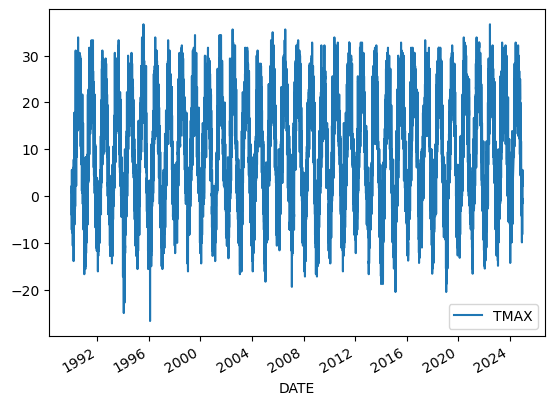

In [53]:
data.plot(y="TMAX")

Let's see how we can apply rolling statistics with our time series and calculate a moving average based on four closest (consecutive) temperature observations. To do this, we can use the `.rolling()` method, which takes an integer number as an argument by default to specify how many observations should be grouped together (i.e., the window size). By chaining the `.mean()` command after `.rolling()`, we can specify that we want to calculate the average temperature based on those four observations.

In [54]:
moving_temps = data["TMAX"].rolling(4).mean()
moving_temps

DATE
1990-01-01      NaN
1990-01-02      NaN
1990-01-03      NaN
1990-01-04   -0.575
1990-01-05   -1.400
              ...  
2024-12-26   -0.225
2024-12-27    1.300
2024-12-28    2.650
2024-12-29    3.875
2024-12-30    3.875
Name: TMAX, Length: 12751, dtype: float64

As output here, we get a Series in which time is the index and the newly calculated moving-window average temperatures are the values. As can be seen in this example, the first three temperature values are NaN, which is expected because we specified that the average should always be based on four consecutive observations. Thus, the average cannot be calculated for the first three observations, and pandas returns NaN.

In addition, it is important to note that `.rolling()` and `.resample()` work similarly, but also have differences. The main difference is that the .rolling() will maintain the number of observations in the data (but change the values according neighboring values, for example based on the mean), whereas .resample() will actually aggregate and reduce the number of observations that will be stored in the result.

With our data set, we are fortunate that we are working with observations at regular intervals (daily), but this is not always the case. In situations where the observations are made at irregular time intervals (e.g., several times per day at irregular intervals) using a moving window with a set number of observations can result in unwanted consequences and errors in the analysis. This issue can be handled by passing a `DateOffset` as an argument in the `.rolling()` function, similar to how we did earlier when resampling our data. If the observations occur more frequently than daily, you might use a fixed window size of one day by passing `"1D"` to the function. This will keep the time span equal, no matter how many observations there would be recorded within a single day. Note, however, that the time interval being used should be equal, so values such as `"1MS"` for monthly intervals would not be consistent since the number of days in a month varies.

In our case, we can use this approach to easily calculate rolling statistics with different window sizes, such as weekly, monthly or even annual averages. We can do this by specifying a varying number of days for the moving window. To demonstrate the influence of "smoothing" our time series based on different moving window sizes, let's calculate the moving average of temperatures based on window sizes of 180 days and 360 days (roughly one year), and plot the results.

In [55]:
half_year = data["TMAX"].rolling("180D").mean()
annual = data["TMAX"].rolling("360D").mean()

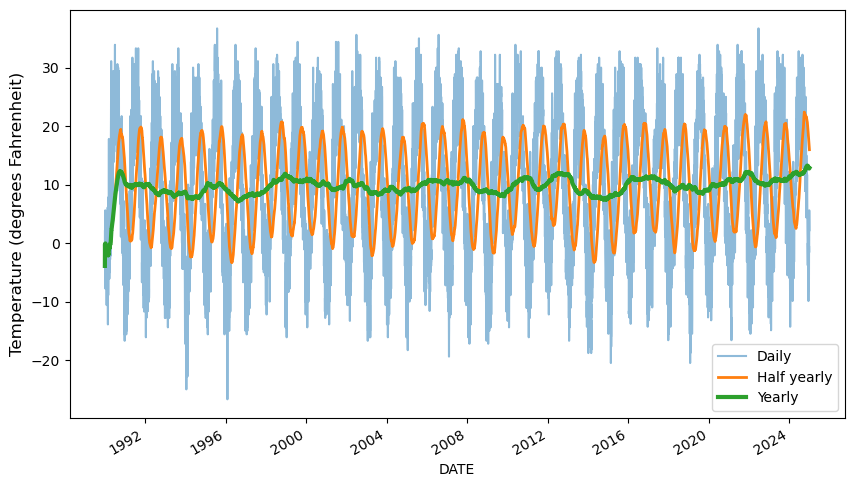

In [56]:
# Plot
ax = data.plot(y="TMAX", figsize=(10,6), alpha=0.5, label="Daily")
ax = half_year.plot(ax=ax, y="TMAX", lw=2, label="Half yearly")
ax = annual.plot(ax=ax, y="TMAX", lw=3, label="Yearly")
ax.set_ylabel("Temperature (degrees Fahrenheit)", size=12)
ax.legend()


As a result, we have three different lines showing how the raw daily temperature observations (blue line) compare to those smoothed for roughly half a year (orange line) or one year (green line). The daily values show how much temperature varies day to day in our data set, while yearly values roughly show how much temperatures vary from year to year. As we can observe, the variance between observations is reduced (i.e., smoothed) when the size of the window is larger. 

It is worthwhile to note two other common rolling statistical calculations that can be done using pandas. First, it is possible to use exponentially weighted (EW) window functions to give more weight to observations that are closer to the center of the window (closer in time in our case) using a decay function. The pandas method `.ewm()` can be used for this as described in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html). Second, in addition to the moving window functions, pandas provides a method called `.expanding()`, which increases the size of the window for each observation until it encompasses the whole series. This method basically accumulates the information on each observation, similar to cumulative summing, and can be useful in some predictive applications where cumulative information about the given phenomena can provide more accurate results using more observations, for example. More information about the `.expanding()` method can be found in the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html).